# Heart Diseas Classifier 

In [77]:
# importing data processing libraries
import numpy as np 
import pandas as pd

In [78]:
# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Data Acquisition

In [80]:
df = pd.read_csv("heart.csv")

In [81]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Exploratory Data Analysis**

In [82]:
sns.set_style(style='darkgrid')

<AxesSubplot:xlabel='age', ylabel='Count'>

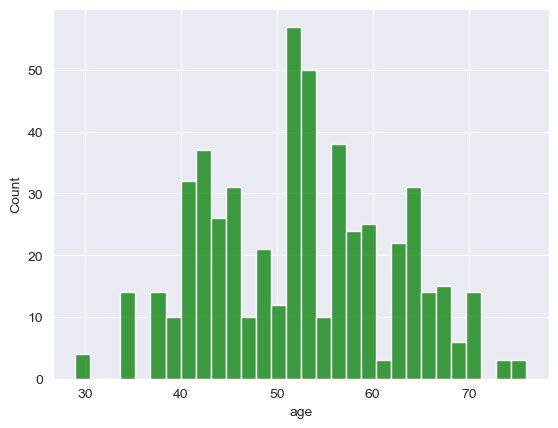

In [83]:
# Checking the range of the age who died because of cancer
sns.histplot(df[df['target']==1]['age'],bins=30,color='green')

<AxesSubplot:xlabel='sex', ylabel='count'>

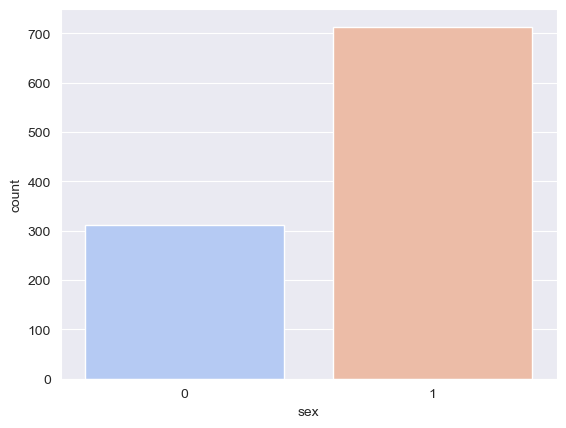

In [84]:
# gender-wise checking the death
sns.countplot(x='sex',data = df,palette='coolwarm')

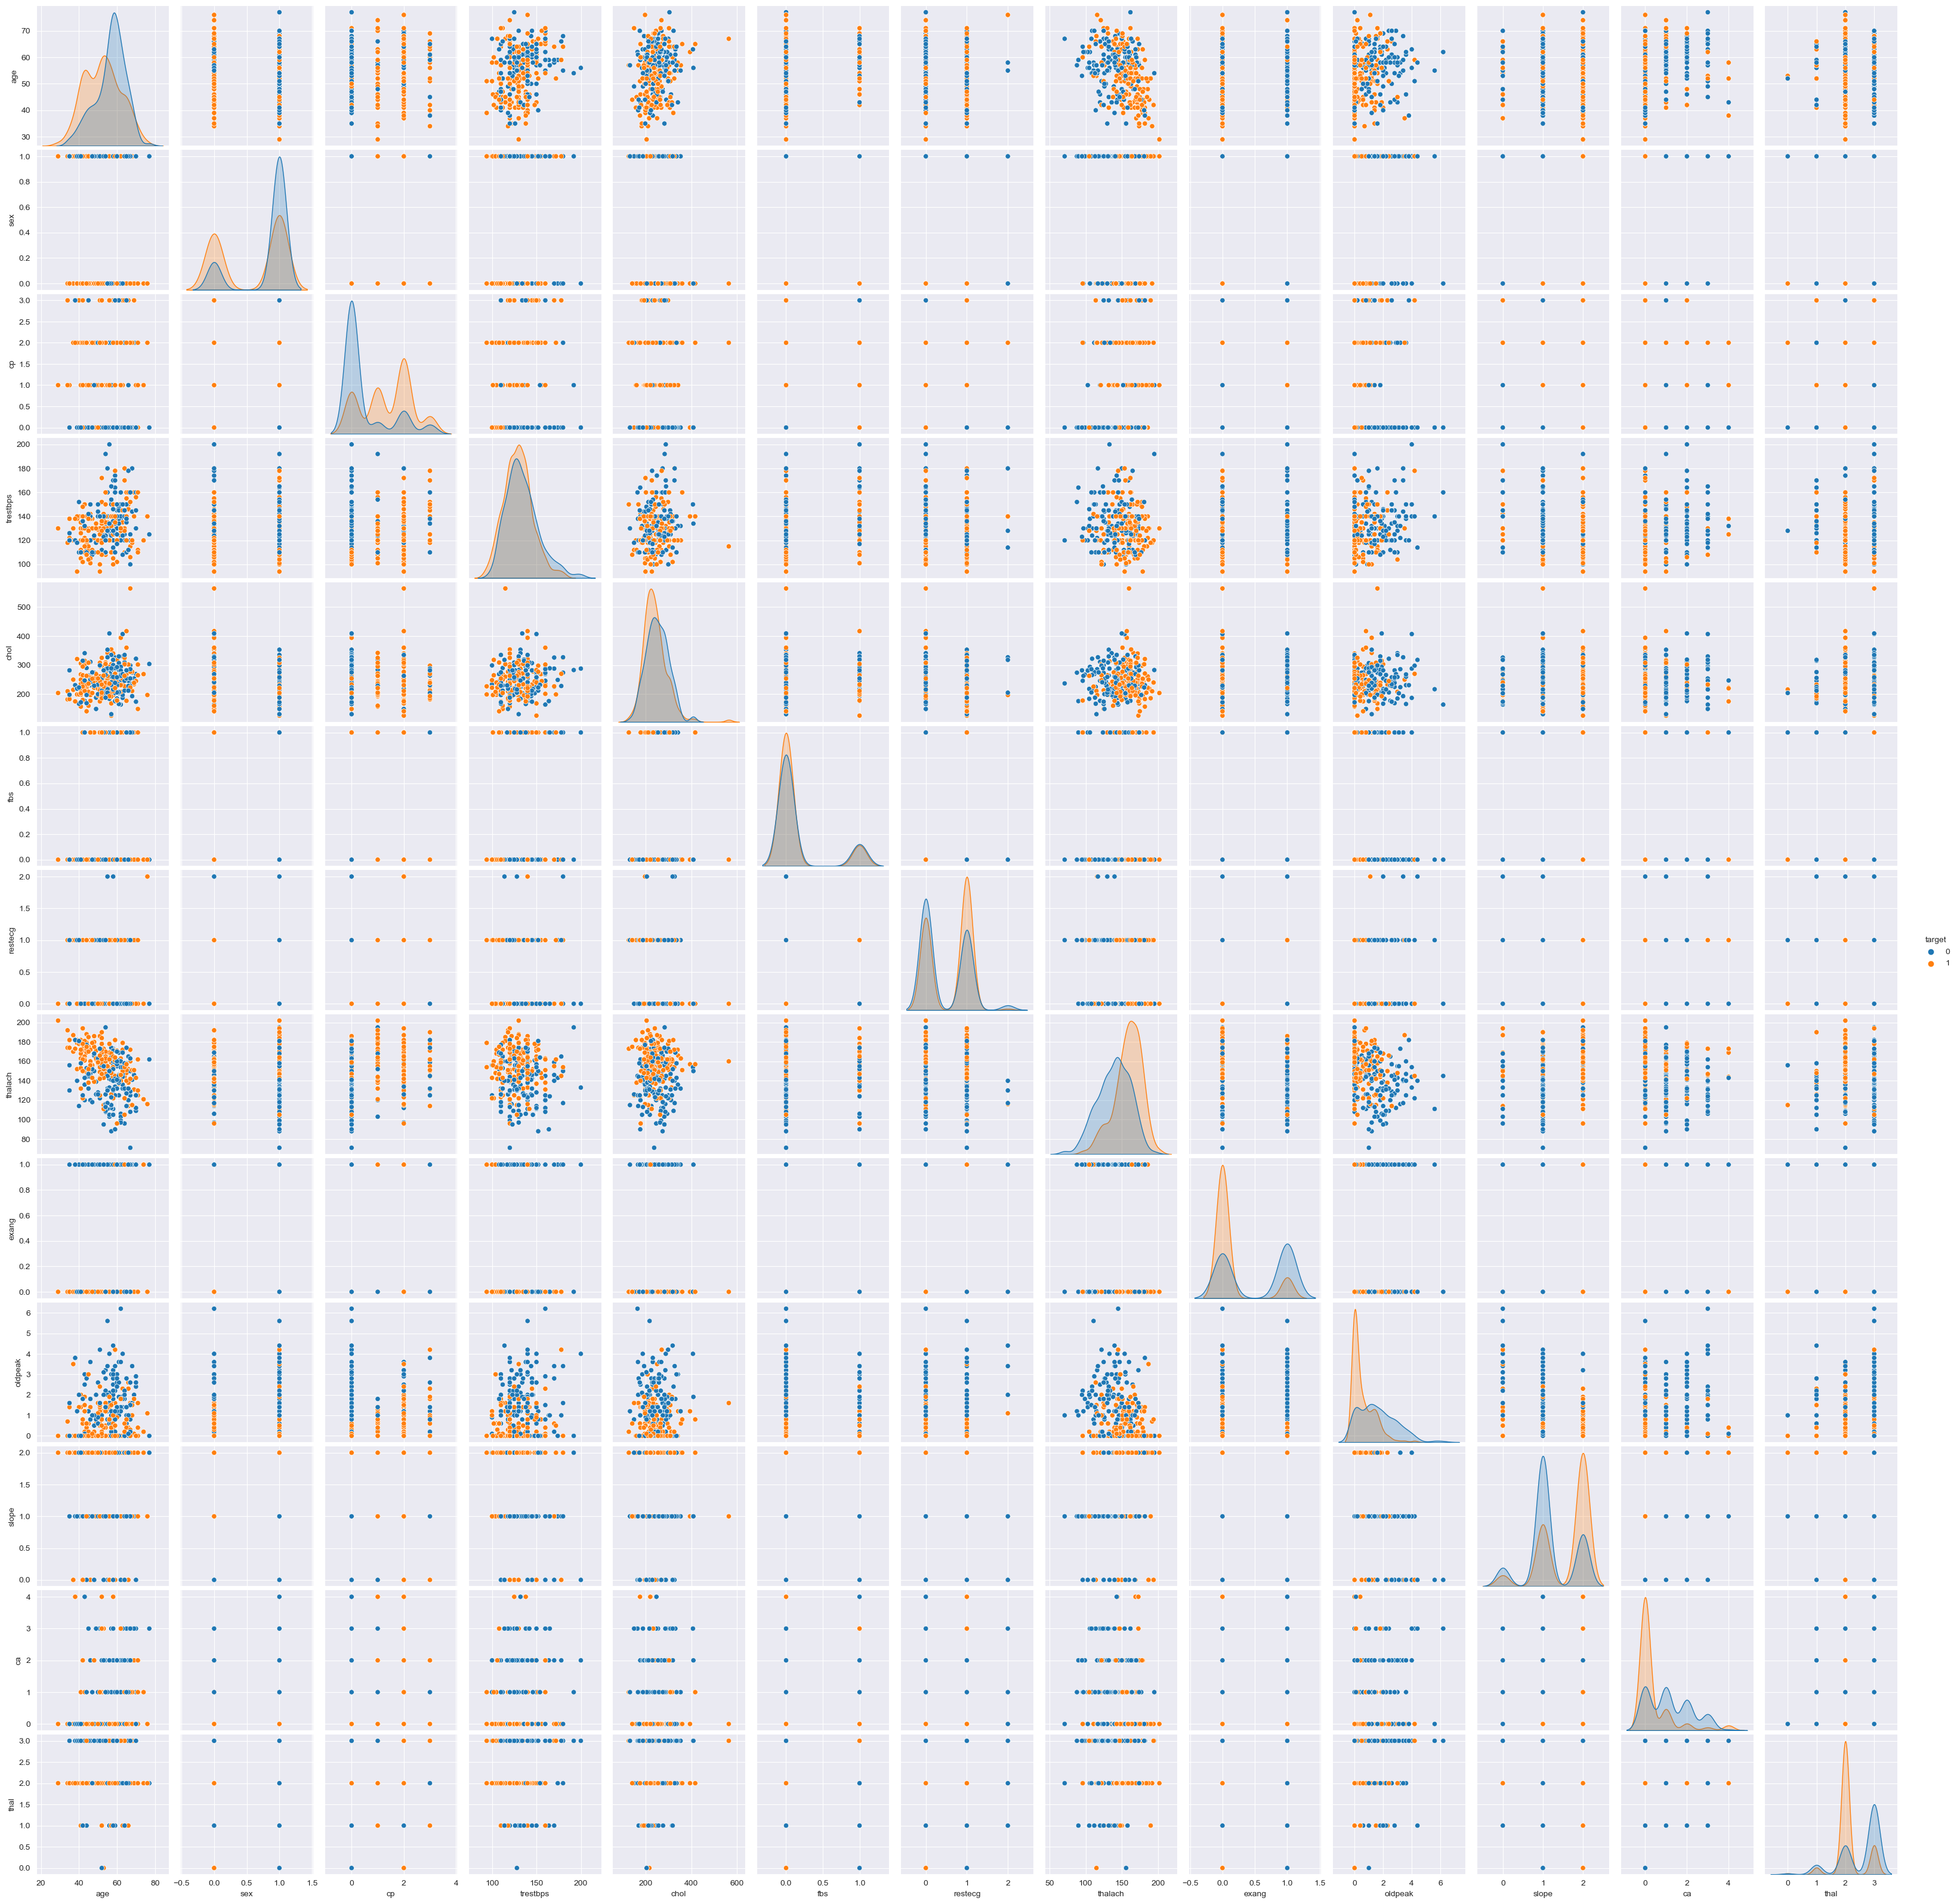

In [85]:
# over all analysis
sns.pairplot(df,hue = 'target')

In [86]:
# train test split
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Creating random forest model**

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf = RandomForestClassifier(max_samples=0.75,bootstrap=True,oob_score=True)

**Training random forest model**

In [91]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.75, oob_score=True)

In [92]:
y_pred = rf.predict(X_test)

**Model evaluation**

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy_score(y_test,y_pred)

1.0

- The model trained well because data is less if we deal with large amount of data then we need to perform so many tasks like hyper-parameter tunning using grid-searchCV, crossval_score
- Note : RandomsearchCV is a method used for random forest. It we have large amount of data we use it.In this we generally pick randomly fixed number of combination to find well parameter.althogh it will not better in general but we will prefer it for large amount of data to get quick result.

# Decision Tree

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
clf = KNeighborsClassifier(n_neighbors=1)

In [97]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [98]:
y_pred = clf.predict(X_test)

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [99]:
accuracy_score(y_test,y_pred)

0.9853658536585366

In [100]:
from mlxtend.plotting import plot_decision_regions

ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>